## Extracting best features from from Wine Quality dataset using Wrapping techniques .

* Data Link : https://www.kaggle.com/datasets/rajyellow46/wine-quality 

* Drive link : https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv


In [2]:
import pandas as pd
import numpy as np 

In [31]:
df = pd.read_csv('/content/winequalityN - winequalityN.csv')

In [26]:
df.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5194,red,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.9,5
5244,red,6.6,0.815,0.02,2.7,0.072,17.0,34.0,0.99550,3.58,0.89,12.3,7
5628,red,9.5,0.550,0.66,2.3,0.387,12.0,37.0,0.99820,3.17,0.67,9.6,5
2488,white,7.9,0.270,0.27,1.7,0.034,25.0,122.0,0.99088,2.97,0.51,11.9,6
5163,red,11.8,0.260,0.52,1.8,0.071,6.0,10.0,0.99680,3.20,0.72,10.2,7
4362,white,6.2,0.240,0.27,2.9,0.039,30.0,123.0,0.98959,3.12,0.37,12.8,6
2969,white,6.7,0.200,0.30,1.4,0.025,17.0,76.0,0.99104,3.11,0.44,11.0,6
5876,red,7.0,0.400,0.32,3.6,0.061,9.0,29.0,0.99416,3.28,0.49,11.3,7
356,white,7.3,0.220,0.37,14.3,0.063,48.0,191.0,0.99780,2.89,0.38,9.0,6
4099,white,6.4,0.500,0.20,2.4,0.059,19.0,112.0,0.99314,3.18,0.40,9.2,6


In [32]:
df.shape

(6497, 13)

In [14]:
# Treating Null Values 
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [35]:
nulls = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','pH','sulphates']
for i in nulls:
  df[i].fillna(df[i].mean(),inplace=True)

In [24]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
# Encoding Type column
df['type'] = df['type'].replace(['red', 'white'], [1,0])

In [27]:
!pip install --upgrade scikit-learn mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the data into dependent and independent variables
x = df.drop('quality',axis=1)
y = df['quality']

# Splitting the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

# Creating a baseline Logistic Regression Model 
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(x_train,y_train)

# Generating Predictions
y_pred = log_reg.predict(x_test)

# Getting accuracy 
accuracy = accuracy_score(y_test,y_pred)
print('Test accuracy- ',accuracy)

Test accuracy-  0.548923076923077


In [71]:
# Feature Selection using Wrapper Method

# 1- Exhaustive Feature Selection
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS 

# lr = LogisticRegression()
# sel = EFS(lr, max_features = 11, min_features= 5, scoring = "accuracy", cv=5,n_jobs=-1)
# model = sel.fit(df.iloc[:,:13],df['quality'])
# print('best combo score: ',model.best_score_)

# This method has been commented because it will take too much time to fetch results as it trains onto each data sebset i.e. all the permutations and combinantions. This computational complexity is the limitation of this model
# .Thus, we will be going forward with the next method which exactly is the improvement of this limitation of Exhausive approach.

In [45]:
# Splitting the data into dependent and independent variables
x = df.drop('quality',axis=1)
y = df['quality']

# Splitting the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)  

# 2- Sequential/Forward Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
lr = LogisticRegression()
sfs = SFS(lr,k_features='best',forward=False,floating=False,scoring='accuracy',cv=5) # Changing the paramenter forward = True will make it as sequential forward feature selection.
sfs.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(1, 12), scoring='accuracy')

In [46]:
# Indices of important features 
sfs.k_feature_idx_

(0, 1, 2, 4, 5, 8, 11)

In [57]:
# Generating dataframe summary results
metric_df = pd.DataFrame(sfs.get_metric_dict()).T
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))

In [58]:
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,num_features
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.4533333333333333, 0.4841025641025641, 0.490...",0.469007,"(type, fixed acidity, volatile acidity, citric...",0.019885,0.015471,0.007736,12
11,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11)","[0.4728205128205128, 0.5425641025641026, 0.508...",0.501229,"(type, fixed acidity, volatile acidity, citric...",0.031235,0.024302,0.012151,11
10,"(0, 1, 2, 3, 4, 5, 8, 9, 10, 11)","[0.5138461538461538, 0.5528205128205128, 0.526...",0.52668,"(type, fixed acidity, volatile acidity, citric...",0.018181,0.014146,0.007073,10
9,"(0, 1, 2, 3, 4, 5, 8, 10, 11)","[0.5343589743589744, 0.5538461538461539, 0.532...",0.534068,"(type, fixed acidity, volatile acidity, citric...",0.01492,0.011608,0.005804,9
8,"(0, 1, 2, 3, 4, 5, 8, 11)","[0.5384615384615384, 0.5528205128205128, 0.543...",0.536532,"(type, fixed acidity, volatile acidity, citric...",0.014466,0.011255,0.005628,8
7,"(0, 1, 2, 4, 5, 8, 11)","[0.5374358974358975, 0.556923076923077, 0.5451...",0.536736,"(type, fixed acidity, volatile acidity, residu...",0.017929,0.01395,0.006975,7
6,"(0, 1, 2, 4, 8, 11)","[0.5353846153846153, 0.5579487179487179, 0.541...",0.53571,"(type, fixed acidity, volatile acidity, residu...",0.017445,0.013573,0.006786,6
5,"(0, 2, 4, 8, 11)","[0.5456410256410257, 0.556923076923077, 0.5297...",0.53119,"(type, volatile acidity, residual sugar, densi...",0.023617,0.018375,0.009188,5
4,"(0, 2, 4, 11)","[0.5384615384615384, 0.558974358974359, 0.5359...",0.532218,"(type, volatile acidity, residual sugar, alcohol)",0.022153,0.017236,0.008618,4
3,"(0, 2, 11)","[0.5148717948717949, 0.5425641025641026, 0.519...",0.521343,"(type, volatile acidity, alcohol)",0.014135,0.010998,0.005499,3


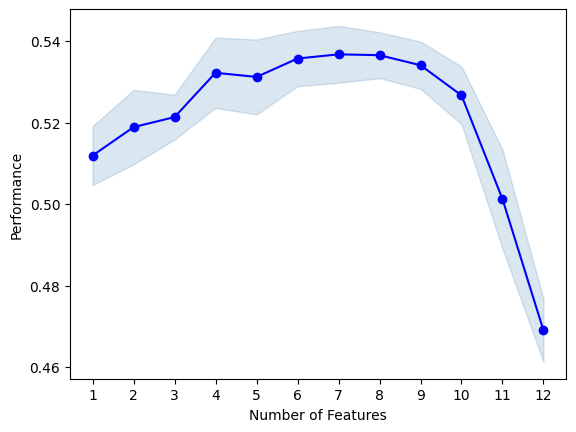

In [51]:
# Plotting the accuracy of different combinations 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs.get_metric_dict(),kind='std_err')

In [55]:
# Transforming the X train and X test data with best feature subset 
x_train_sel = sfs.transform(x_train)
x_test_sel = sfs.transform(x_test)

# Re-training the LR model to compare accracy score with the base model
model = LogisticRegression(max_iter=10000)
model.fit(x_train_sel,y_train)

# Generating predictions 
y_pred = model.predict(x_test_sel)

# Fetching accuracy
accuracy = accuracy_score(y_test,y_pred)
print('Test accuracy- ',accuracy)

Test accuracy-  0.5464615384615384


In [60]:
# Getting important features
features = []
for i in sfs.k_feature_idx_:
  features.append(i)

In [62]:
# Cloning dataset
df1 = df

In [69]:
df1= df[['type', 'fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'density', 'alcohol']]

In [70]:
# Filtered dataset
df1

,type,fixed acidity,volatile acidity,residual sugar,chlorides,density,alcohol
0,0,7.0,0.270,20.7,0.045,1.00100,8.8
1,0,6.3,0.300,1.6,0.049,0.99400,9.5
2,0,8.1,0.280,6.9,0.050,0.99510,10.1
3,0,7.2,0.230,8.5,0.058,0.99560,9.9
4,0,7.2,0.230,8.5,0.058,0.99560,9.9
...,...,...,...,...,...,...,...
6492,1,6.2,0.600,2.0,0.090,0.99490,10.5
6493,1,5.9,0.550,2.2,0.062,0.99512,11.2
6494,1,6.3,0.510,2.3,0.076,0.99574,11.0
6495,1,5.9,0.645,2.0,0.075,0.99547,10.2


**Out of 12 independent featrures we dropped 5 and still maintained approx. same accuracy score. Thus sequential backward feature selection of wrapping method helped in reducing the "Curse of Dimensionality"**